Dimensionless stellar radius: 6.9090
Dimensionless stellar mass: 2.0170
Central density to average density ratio: 54.5030
K: 3.8425e+09 m3 / (kg(1/3) s2)
N_n: 0.3641
W_n: 11.1425
**********
Mass (given): 1.00 solMass 
Radius (given): 1.00 solRad
Central pressure:  1.26e+16 N / m2
Central density: 7.68e+04 kg / m3
Central temperature: 1.21e+07 K kg


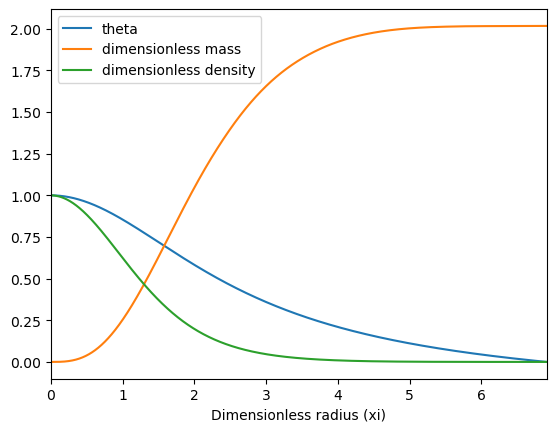

In [ ]:
import numpy as np
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from lib.lane_emden import lane_emden




# set polytropic index
n=3

# mass of star to model 
M = 1 * u.M_sun
R = 1 * u.R_sun

solar_abundances = (0.71, 0.27, 0.02)
def mean_molecular_weight_ionized (X,Y,Z) :
    return 1 / (2*X + 3*Y/4 + Z/2) * u.kg

mu_sun = mean_molecular_weight_ionized(*solar_abundances)

#get solution to Lane-Emden
sol = lane_emden(n)

# dimensionless stellar radius
xi_1 = sol.t[-1]
radius_dimensionless = xi_1
# dimensionless stellar mass
mass_dimensionless = -xi_1**2 * sol.y[1][-1]
# dimensionless average inverse density
rho_c_over_rho_avg = 1/3*(xi_1/-sol.y[1][-1])

# following parameters from Jill Knapp, notes for AST 403 / PHY 402 Stars and Star Formation
# https://www.astro.princeton.edu/~gk/A403/polytrop.pdf
# (this calculation of K only valid for n=3)
K = ((np.pi * M**2)/(4*mass_dimensionless)**2)**(1/3)*const.G
N_n = (4*np.pi)**(1/n) / (n+1) * (mass_dimensionless)**((1-n)/n) * radius_dimensionless**((n-3)/n)
W_n = ((3/(4*np.pi))*rho_c_over_rho_avg)**((n+1)/n) * N_n

# radius
#R = (K / (const.G * N_n * M**((n-1)/n)))**(n/(3-n))

#volume
V = 4/3 * np.pi * R**3
# central pressure
P_c = W_n*const.G*M**2/R**4
# central density
rho_avg = M/V
rho_c = rho_c_over_rho_avg*rho_avg

# central temperature - using ideal gas law
# T = P/(n*k_B) where n is the number density of particles
n_c = rho_c / (mu_sun * (const.m_p+const.m_e))              
T_c = P_c / (n_c * const.k_B)


density_profile = sol.y[0]**n
density_mass = -(sol.t**2)*sol.y[1]

#print the statistics
print(f"Dimensionless stellar radius: {radius_dimensionless:.4f}")
print(f"Dimensionless stellar mass: {mass_dimensionless:.4f}")
print(f"Central density to average density ratio: {rho_c_over_rho_avg:.4f}")
print(f"K: {K.decompose():.4e}")
print(f"N_n: {N_n:.4f}")
print(f"W_n: {W_n:.4f}")
print("**********")
print(f"Mass (given): {M:.2f} ")
print(f"Radius (given): {R:.2f}")
print(f"Central pressure: {P_c.to(u.N * u.m**(-2)): .2e}")
print(f"Central density: {rho_c.decompose():.2e}")
print(f"Central temperature: {T_c.decompose():.2e}")


# plot the solution
plt.plot(sol.t, sol.y[0], label='theta')
plt.plot(sol.t, density_mass, label='dimensionless mass')
plt.plot(sol.t, density_profile, label='dimensionless density')


plt.xlim(0, sol.t[-1])
plt.xlabel('Dimensionless radius (xi)')
plt.legend()
plt.show()




